
# Лабораторная работа 6: Машина опорных векторов (SVM)

<img src="svm_img.png" width=350>

Результат лабораторной работы — **отчет** в формате ноутбуков IPython (ipynb-файл). Нам не интересен ваш код. Чем меньше кода, тем лучше всем: нам — меньше проверять, вам — проще найти ошибку или дополнить эксперимент.

Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Ответы на вопросы должны быть полными, четкими и хорошо аргументированными.

## 1. Квадратичное программирование и QP-солвер

Квадратичное программирование (QP) — специальный тип задач математической оптимизации, заключающийся в нахождении точки минимума неотрицательно-определенной квадратичной формы (многомерная парабола) в присутствии линейных ограничений:
$$
\begin{gather}
    \frac{1}{2}\boldsymbol x^T\boldsymbol P\boldsymbol x + \boldsymbol q^T\boldsymbol x \to \min_{\boldsymbol x} \\
    \begin{aligned}
        \text{s.t.} \quad & \boldsymbol G\boldsymbol x \le \boldsymbol h \\
        & \boldsymbol A\boldsymbol x = \boldsymbol b
    \end{aligned}
\end{gather}
$$

Здесь $\boldsymbol P$ — симметричная матрица. В ограничениях $\boldsymbol G\boldsymbol x \le \boldsymbol h$ и $\boldsymbol A\boldsymbol x = \boldsymbol b$ под знаками равенства и неравенства подразумевается сравнение всех компонент векторов.

Задача квадратичного программирования хорошо изучена, существуют эффективные алгоритмы для ее решения. Имеется множество библиотек с солверами для задачи QP, вот некоторые из них:
 - [CVXOPT](http://cvxopt.org/) (свободно-распространяемая, Python) **рекомендуется к использованию**
 - [Mosek](https://www.mosek.com/) (коммерческая с возможностью получения академической лицензии, C, Java, MATLAB, .NET, R, Python)
 - [Matlab Optimization Toolbox](http://www.mathworks.com/help/optim/ug/quadprog.html)

#### Задание

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

In [1]:
!apt-get install -y python3-cvxopt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libamd2 libcamd2 libccolamd2 libcholmod3 libcolamd2 libdsdp-5.8gf
  libfftw3-double3 libglpk40 libgsl27 libgslcblas0 libmetis5
  libsuitesparseconfig5 libumfpack5
Suggested packages:
  libfftw3-bin libfftw3-dev libiodbc2-dev gsl-ref-psdoc | gsl-doc-pdf
  | gsl-doc-info | gsl-ref-html python-cvxopt-doc
The following NEW packages will be installed:
  libamd2 libcamd2 libccolamd2 libcholmod3 libcolamd2 libdsdp-5.8gf
  libfftw3-double3 libglpk40 libgsl27 libgslcblas0 libmetis5
  libsuitesparseconfig5 libumfpack5 python3-cvxopt
0 upgraded, 14 newly installed, 0 to remove and 41 not upgraded.
Need to get 3,563 kB of archives.
After this operation, 10.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsuitesparseconfig5 amd64 1:5.10.1+dfsg-4build1 [10.4 kB]
Get:2 http://archive.ubuntu.com/ubu

In [7]:
#1. Установка QP-солвера


from cvxopt import matrix, solvers
solvers.options['show_progress'] = False


In [8]:
# 2. Решение тестовой задачи QP

import numpy as np

P = matrix([[2.0, 0.0],
            [0.0, 8.0]])

q = matrix([-8.0, -16.0])


G = matrix([
    [ 1.0, -1.0,  1.0,  0.0],
    [ 1.0,  0.0,  0.0, -1.0]
])

h = matrix([5.0, 0.0, 3.0, 0.0])

# Решение задачи
solution = solvers.qp(P, q, G, h)

x_opt = np.array(solution['x']).flatten()

print("Оптимальное решение x* =", x_opt)

Оптимальное решение x* = [2.99999983 1.99869093]


In [9]:
#3 Активные ограничения

import numpy as np

# Оптимум, найденный во втором пункте (CVXOPT)
x_opt = np.array([2.99999983, 1.99869093])

# Ограничения Gx ≤ h
G = np.array([
    [ 1.0,  1.0],   # 1) x1 + x2 ≤ 5
    [-1.0,  0.0],   # 2) x1 ≥ 0  ( -x1 ≤ 0 )
    [ 1.0,  0.0],   # 3) x1 ≤ 3
    [ 0.0, -1.0],   # 4) x2 ≥ 0  ( -x2 ≤ 0 )
])

h = np.array([5.0, 0.0, 3.0, 0.0])

names = [
    "x1 + x2 ≤ 5",
    "x1 ≥ 0",
    "x1 ≤ 3",
    "x2 ≥ 0"
]

# Остатки h - Gx
residuals = h - G.dot(x_opt)

tol = 1e-6  # критерий активности

print("Проверка активных ограничений \n")
print(f"Оптимальное решение: x1 = {x_opt[0]:.6f},  x2 = {x_opt[1]:.6f}\n")

for name, r in zip(names, residuals):
    active = abs(float(r)) < tol
    print(f"{name:12s} : active = {active},   h - Gx = {float(r):.6f}")

# Список активных ограничений
active_list = [name for name, r in zip(names, residuals) if abs(float(r)) < tol]

print("\nИТОГ:")
if active_list:
    print("Активные ограничения:", active_list)
else:
    print("Активных ограничений нет")

Проверка активных ограничений 

Оптимальное решение: x1 = 3.000000,  x2 = 1.998691

x1 + x2 ≤ 5  : active = False,   h - Gx = 0.001309
x1 ≥ 0       : active = False,   h - Gx = 3.000000
x1 ≤ 3       : active = True,   h - Gx = 0.000000
x2 ≥ 0       : active = False,   h - Gx = 1.998691

ИТОГ:
Активные ограничения: ['x1 ≤ 3']


## 2. Линейный SVM

Рассмотрим задачу бинарной классификации. Будем обозначать обучающую выборку $\{(\boldsymbol x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

Машина опорных векторов обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $\quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений.

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели.

Гиперпараметр $C$ отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соотвествующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального параметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям называются _опорными_.

#### Явное преобразование признаков

Разделяющая гиперплоскость — достаточно грубая модель, редко данные могут быть описаны линейной моделью. Линейная неразделимость векторов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

In [10]:
#настройка окружения
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

# фиксируем случайность
np.random.seed(0)
plt.rcParams.update({'figure.dpi':120})

#подключаем cvxopt для QP
USE_CVXOPT = False
try:
    from cvxopt import matrix, solvers
    solvers.options['show_progress'] = False
    USE_CVXOPT = True
    print("cvxopt найден — QP будет решаться через cvxopt.")
except Exception:
    print("cvxopt не найден — будет использоваться fallback через scipy.")

# Вспомогательная функция для рисовки решений
def plot_decision(ax, predict_func, X, y, sv_mask=None, levels=[-1.0,0.0,1.0]):

    # диапазоны осей
    xlim = (X[:,0].min()-1, X[:,0].max()+1)
    ylim = (X[:,1].min()-1, X[:,1].max()+1)

    # сетка
    xs = np.linspace(xlim[0], xlim[1], 300)
    ys = np.linspace(ylim[0], ylim[1], 300)
    xx, yy = np.meshgrid(xs, ys)
    XY = np.c_[xx.ravel(), yy.ravel()]

    # считаем f(x)
    zz = predict_func(XY).reshape(xx.shape)

    # фон
    ax.pcolormesh(xx, yy, zz, shading='auto', cmap='RdYlBu', alpha=0.25)

    # линии уровня
    cs = ax.contour(xx, yy, zz, levels=levels, colors='k', linewidths=1.0)

    ax.clabel(cs, fmt='%1.1f', fontsize=7, inline=True, manual=False)

    # точки классов
    ax.scatter(X[y==1,0], X[y==1,1], marker='o', edgecolor='k', label='+1')
    ax.scatter(X[y==-1,0], X[y==-1,1], marker='s', edgecolor='k', label='-1')

    # выделение опорных векторов
    if sv_mask is not None and sv_mask.sum() > 0:
        ax.scatter(X[sv_mask,0], X[sv_mask,1],
                   s=120, facecolors='none', edgecolor='k', linewidth=1.5,
                   label='SV')

    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.legend()
    return ax

cvxopt найден — QP будет решаться через cvxopt.


In [11]:
#обучение линейного SVM через QP

def train_primal_svm_qp(X, y, C=1.0, use_cvxopt=USE_CVXOPT):

    N, d = X.shape
    m = d + 1 + N

    # матрица квадратичной части
    P_np = np.zeros((m, m))
    P_np[:d, :d] = np.eye(d)

    # линейная часть
    q_np = np.zeros(m)
    q_np[d+1:] = C

    # формируем матрицы ограничений Gz <= h
    G_list, h_list = [], []

    # ограничения классификации
    for n in range(N):
        row = np.zeros(m)
        row[:d] = -y[n] * X[n]
        row[d] = -y[n]
        row[d+1 + n] = -1.0
        G_list.append(row)
        h_list.append(-1.0)

    # ограничения xi >= 0
    for n in range(N):
        row = np.zeros(m)
        row[d+1+n] = -1.0
        G_list.append(row)
        h_list.append(0.0)

    G_np = np.vstack(G_list)
    h_np = np.array(h_list)

    # пробуем решить через cvxopt
    if use_cvxopt:
        P = matrix(P_np); q = matrix(q_np)
        G = matrix(G_np); h = matrix(h_np)
        sol = solvers.qp(P, q, G, h)
        z = np.array(sol['x']).reshape(-1)
        success = sol['status'] == 'optimal'
    else:
        # fallback через scipy.optimize
        from scipy.optimize import minimize

        def obj(z):
            return 0.5 * np.dot(z[:d], z[:d]) + np.dot(q_np, z)

        cons = []
        for i in range(G_np.shape[0]):
            row = G_np[i]; val = h_np[i]
            cons.append({'type':'ineq', 'fun': lambda z, r=row, v=val: v - np.dot(r, z)})

        z0 = np.zeros(m); z0[d+1:] = 0.1
        res = minimize(obj, z0, constraints=cons, method='SLSQP',
                       options={'maxiter':1000, 'ftol':1e-9})
        z = res.x
        success = res.success

    w = z[:d]
    b = z[d]
    xi = z[d+1:]

    # вычисляем отступы
    margins = y * (X.dot(w) + b)

    # Опорные векторы:
    sv_mask = np.isclose(margins, 1 - xi, atol=1e-5) | (xi > 1e-8)

    return {'w': w, 'b': b, 'xi': xi, 'success': success,
            'sv_mask': sv_mask, 'margins': margins}

In [12]:
# 2генерация трех типов выборок

# Линейно разделимая выборка
X_lin, y_lin = make_classification(
    n_samples=120, n_features=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=2.0, random_state=1
)
y_lin = 2*y_lin - 1

# Нелинейно разделимая, но хорошо отделимая (кружочки)
X_nonlin, y_nonlin = make_circles(
    n_samples=200, factor=0.3, noise=0.05, random_state=2
)
y_nonlin = 2*y_nonlin - 1

# Плохо разделимая (лунки с шумом)
X_poor, y_poor = make_moons(
    n_samples=150, noise=0.35, random_state=3
)
y_poor = 2*y_poor - 1

# стандартизация
X_lin_s = StandardScaler().fit_transform(X_lin)
X_nonlin_s = StandardScaler().fit_transform(X_nonlin)
X_poor_s = StandardScaler().fit_transform(X_poor)

datasets = {
    'linear': (X_lin_s, y_lin),
    'nonlinear_well': (X_nonlin_s, y_nonlin),
    'poor': (X_poor_s, y_poor)
}

print("Датасеты готовы:", list(datasets.keys()))

Датасеты готовы: ['linear', 'nonlinear_well', 'poor']


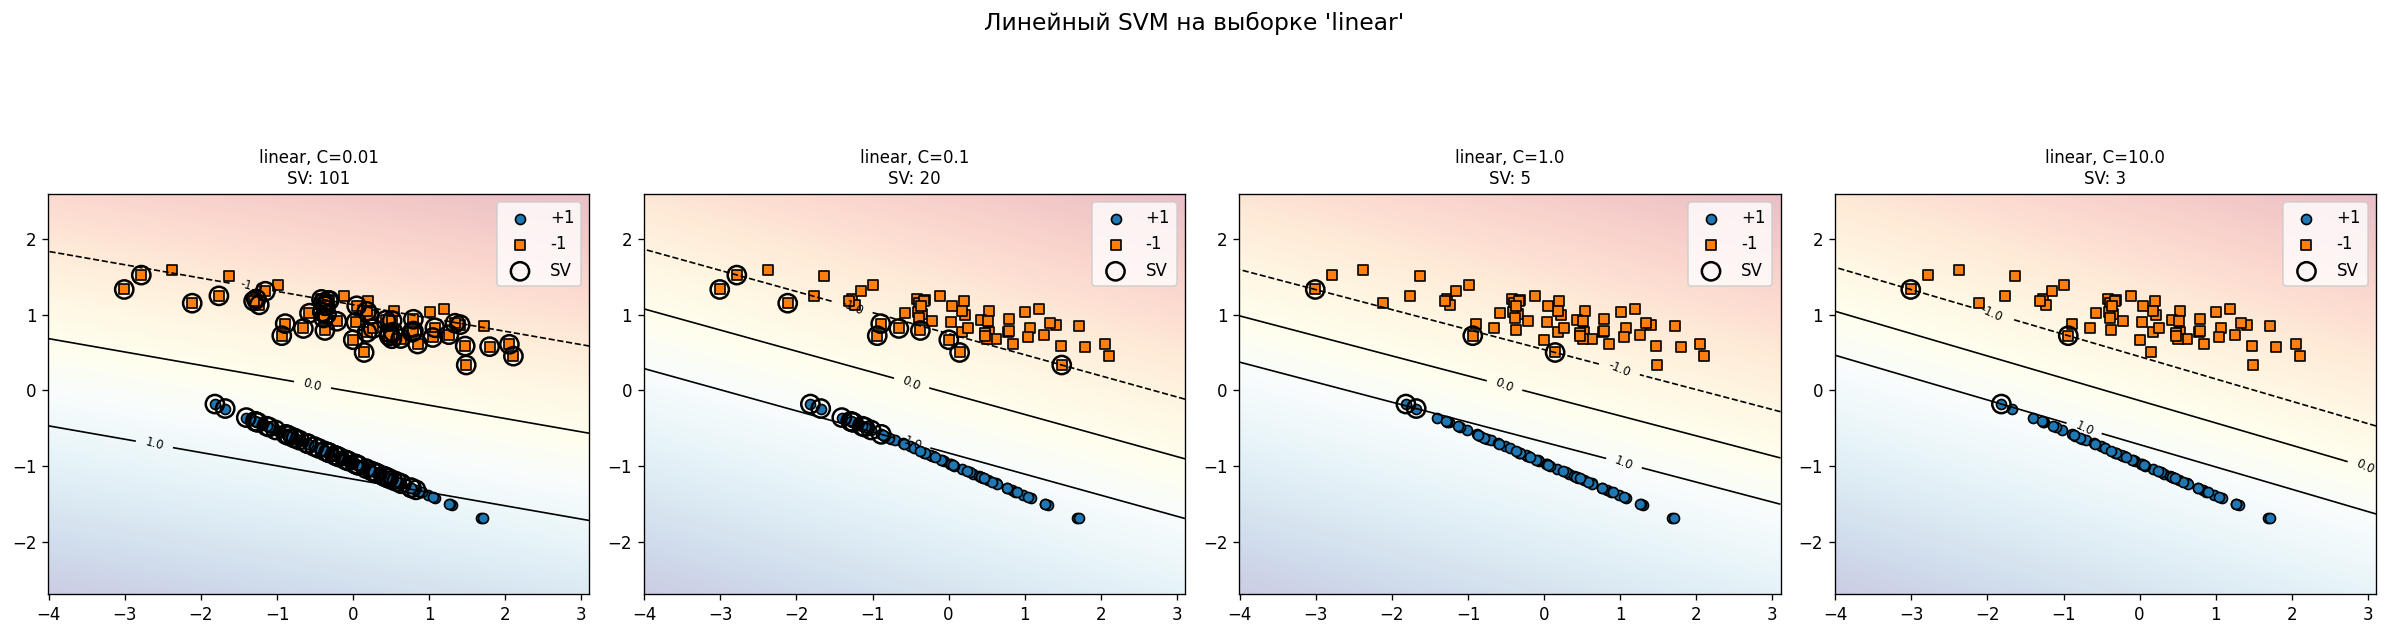

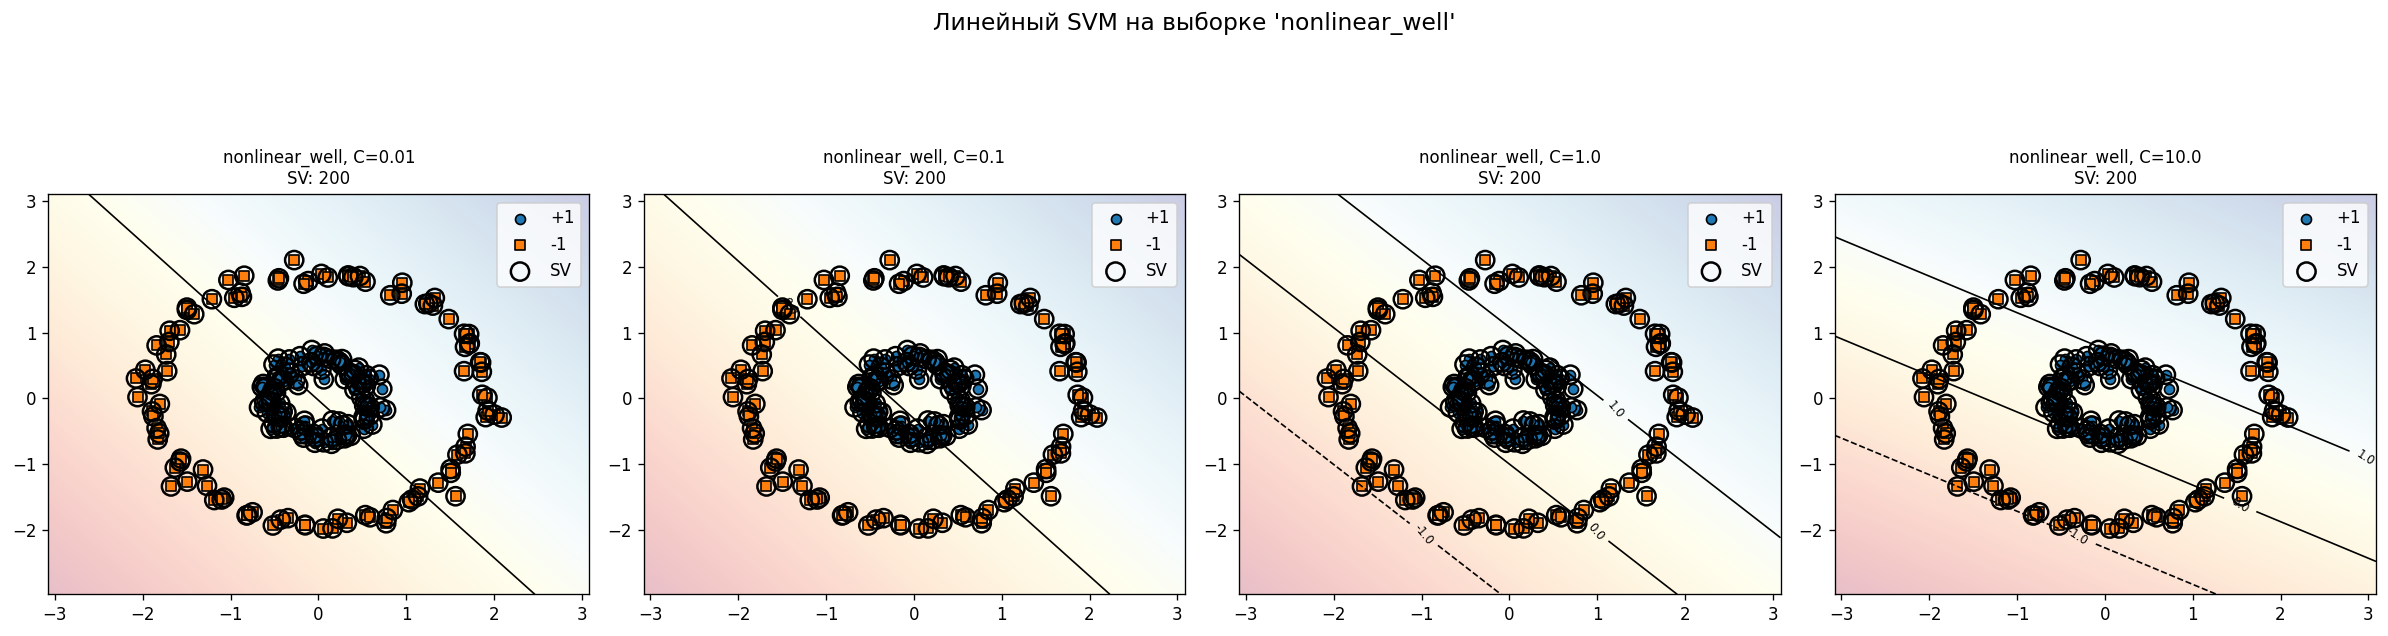

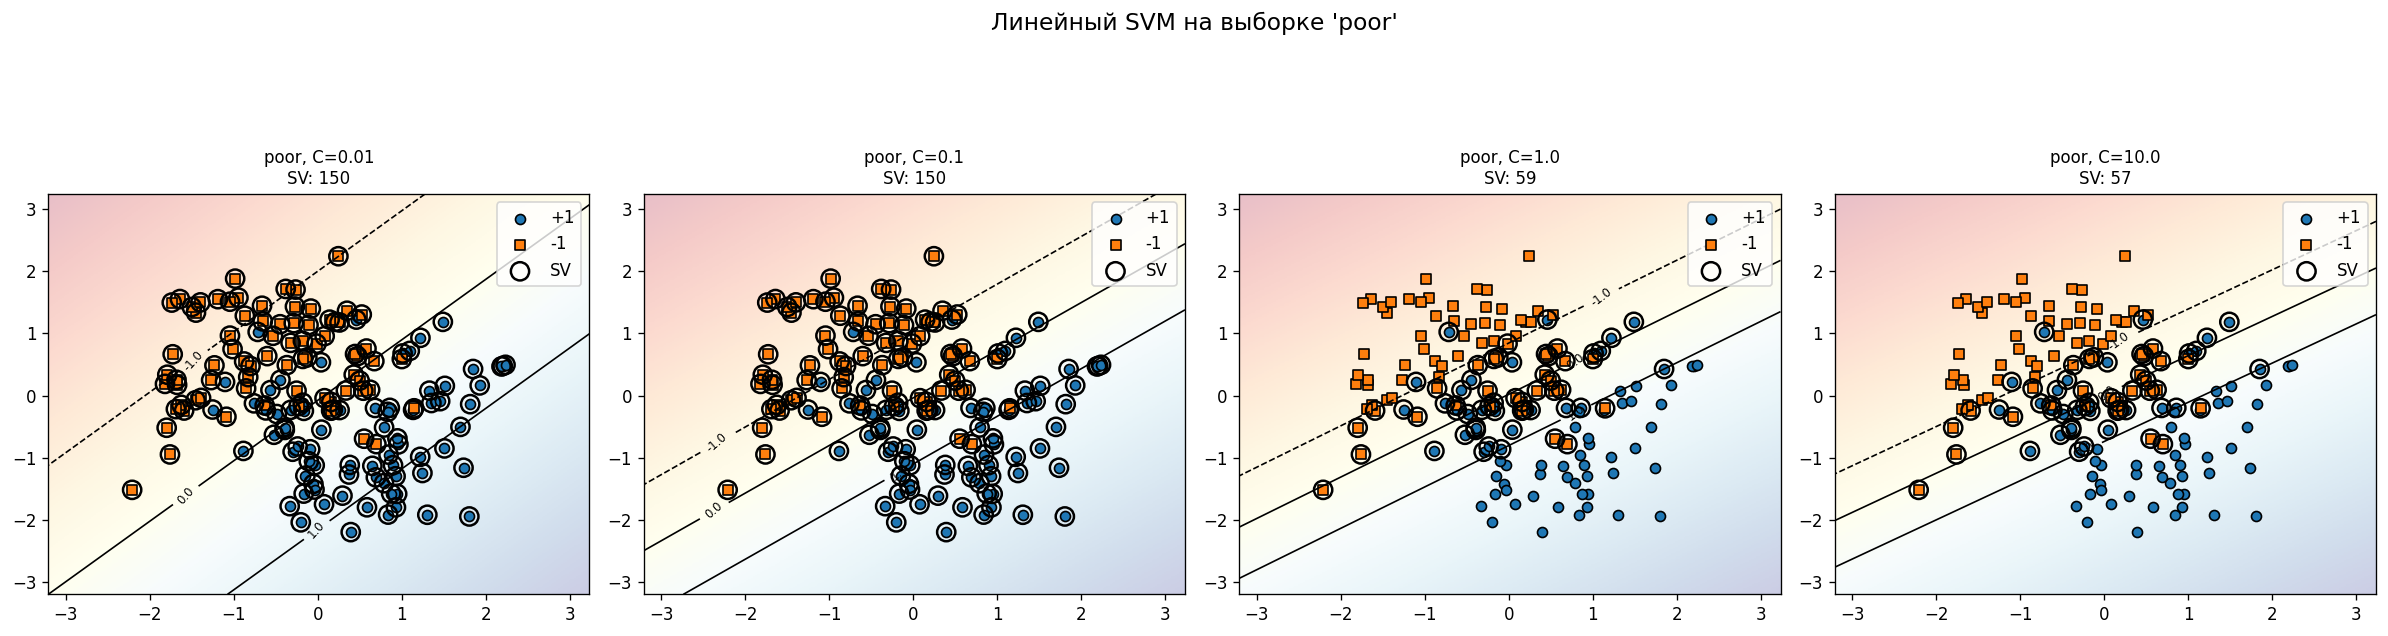

In [13]:
#3 обучение SVM при разных C и визуализация

Cs = [0.01, 0.1, 1.0, 10.0]

for name, (X, y) in datasets.items():
    fig, axes = plt.subplots(1, len(Cs), figsize=(5*len(Cs), 5))

    for ax, C in zip(axes, Cs):
        mdl = train_primal_svm_qp(X, y, C=C)
        val_fun = lambda XX: XX.dot(mdl['w']) + mdl['b']
        sv_mask = mdl['sv_mask']

        plot_decision(ax, val_fun, X, y, sv_mask=sv_mask)
        ax.set_title(f"{name}, C={C}\nSV: {sv_mask.sum()}", fontsize=10, pad=6)

    fig.suptitle(f"Линейный SVM на выборке '{name}'", fontsize=14, y=1.05)

    fig.tight_layout(rect=[0, 0, 1, 0.92])

    plt.show()

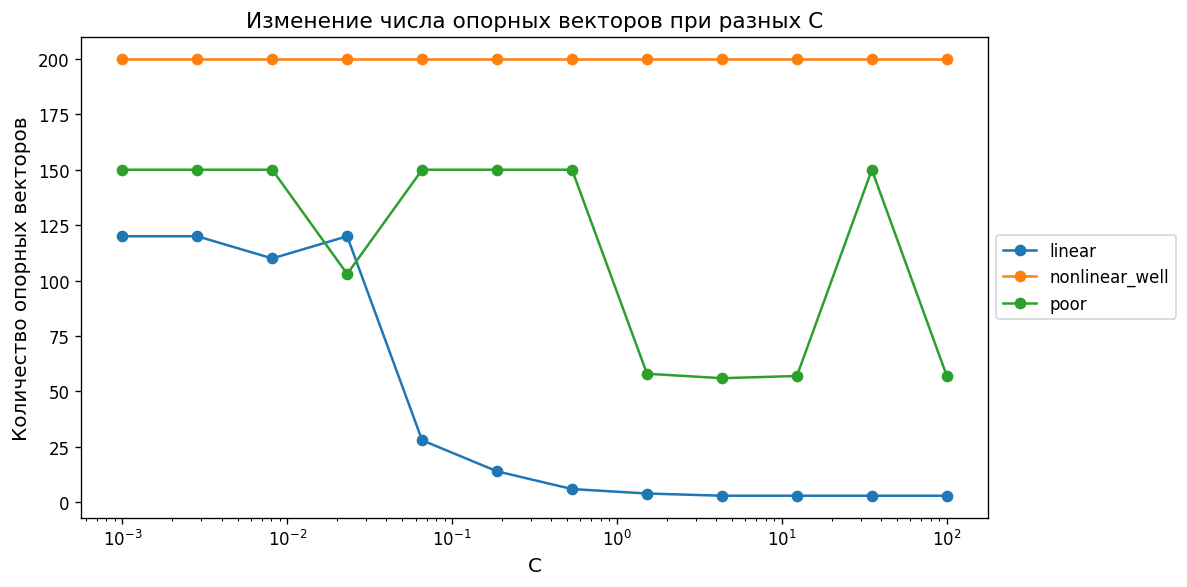

In [15]:
#4 количество опорных векторов при разных значениях C

# Перебор значений параметра C (логарифмическая шкала)
Cs_sweep = np.logspace(-3, 2, 12)

# Словарь, куда будет собираться количество SV для каждого датасета
sv_counts = {name: [] for name in datasets}

# Для каждого датасета и каждого C обучаем SVM и считаем количество SV
for name, (X, y) in datasets.items():
    for C in Cs_sweep:
        mdl = train_primal_svm_qp(X, y, C=C)
        sv_counts[name].append(int(mdl['sv_mask'].sum()))


plt.figure(figsize=(10, 5))

for name in sv_counts:
    plt.semilogx(Cs_sweep, sv_counts[name], marker='o', label=name)


plt.xlabel('C', fontsize=12)
plt.ylabel('Количество опорных векторов', fontsize=12)
plt.title('Изменение числа опорных векторов при разных C', fontsize=13)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()

plt.show()

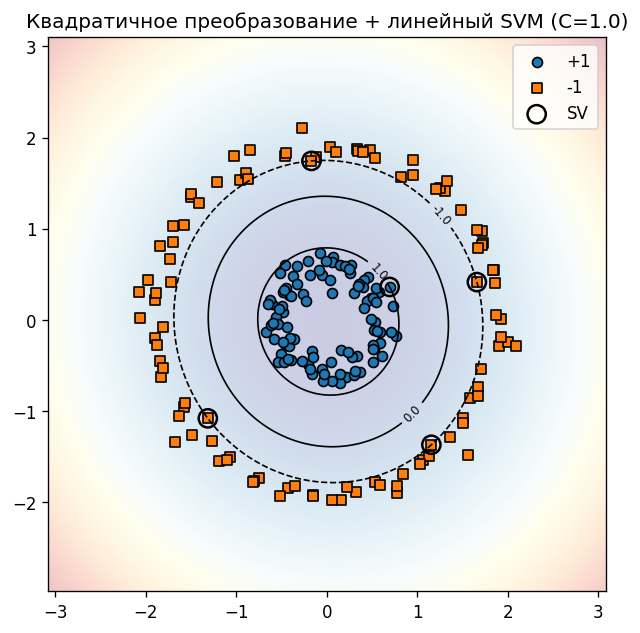

In [16]:
# 5 явное квадратичное преобразование и обучение SVM

def quad_transform(X):
    x1 = X[:,0]; x2 = X[:,1]
    return np.c_[x1, x2, x1**2, x1*x2, x2**2]

# берём нелинейную хорошо разделимую выборку
Xq, yq = datasets['nonlinear_well']
Xq_t = quad_transform(Xq)

#обучаем SVM в расширенном пространстве
mdl_q = train_primal_svm_qp(Xq_t, yq, C=1.0)
w_t = mdl_q['w']
b_t = mdl_q['b']

# решение в исходном 2D
def val_quad(XX):
    Phi = quad_transform(XX)
    return Phi.dot(w_t) + b_t

fig, ax = plt.subplots(figsize=(6,6))
plot_decision(ax, val_quad, Xq, yq, sv_mask=mdl_q['sv_mask'])
ax.set_title("Квадратичное преобразование + линейный SVM (C=1.0)")
plt.show()

# 3. Двойственный переход и Ядровой SVM

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](./SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_.

#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

In [18]:
#1: Реализация ядрового SVM через QP

import numpy as np
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

def kernel_linear(X, Z):
    return X @ Z.T

def kernel_poly(X, Z, p=2):
    return (X @ Z.T + 1.0)**p

def kernel_rbf(X, Z, gamma=1.0):
    X2 = np.sum(X*X, axis=1).reshape(-1,1)
    Z2 = np.sum(Z*Z, axis=1).reshape(1,-1)
    dist2 = X2 + Z2 - 2*(X @ Z.T)
    return np.exp(- dist2 / (2*gamma))


def train_dual_svm_qp(X, y, C, kernel_func):

    N = X.shape[0]
    y = y.astype(float)

    # Считаем матрицу ядра
    K = kernel_func(X, X)

    # Формируем матрицы для QP
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(N))

    # Ограничения 0 ≤ a ≤ C
    G = matrix(np.vstack([-np.eye(N), np.eye(N)]))
    h = matrix(np.hstack([np.zeros(N), C*np.ones(N)]))

    # Ограничение sum a_i y_i = 0
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))

    sol = solvers.qp(P, q, G, h, A, b)
    alpha = np.array(sol['x']).reshape(-1)

    # Опорные вектора: a_i > 1e-6
    sv_mask = alpha > 1e-6

    # Вычисляем b
    # Берём любой опорный вектор с a_i < C
    idx = np.where((alpha > 1e-6) & (alpha < C-1e-6))[0]
    if len(idx) > 0:
        i = idx[0]
        b_val = y[i] - np.sum(alpha * y * K[:, i])
    else:
        # fallback
        b_val = np.mean([y[i] - np.sum(alpha * y * K[:, i]) for i in np.where(sv_mask)[0]])

    return {
        'alpha': alpha,
        'b': b_val,
        'sv_mask': sv_mask,
        'X': X,
        'y': y,
        'kernel': kernel_func
    }



def decision_dual(model, Xtest):
    K = model['kernel'](model['X'], Xtest)
    return (model['alpha'] * model['y']) @ K + model['b']

def predict_dual(model, Xtest):
    return np.sign(decision_dual(model, Xtest))

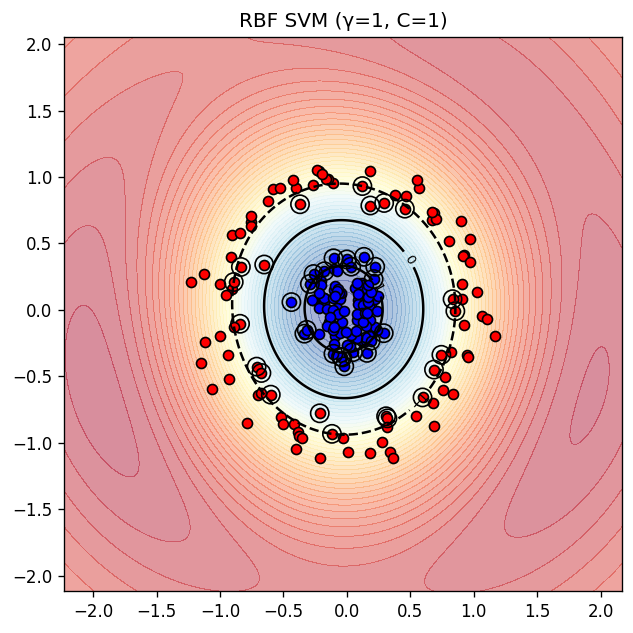

In [19]:
#2: Визуализация решений ядрового SVM

import matplotlib.pyplot as plt

def plot_svm_2d(model, X, y, title=""):

    # Диапазон координат
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xs = np.linspace(x_min, x_max, 300)
    ys = np.linspace(y_min, y_max, 300)
    xx, yy = np.meshgrid(xs, ys)
    grid = np.c_[xx.ravel(), yy.ravel()]

    # f(x)
    zz = decision_dual(model, grid).reshape(xx.shape)

    # Фон
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, zz, levels=50, cmap='RdYlBu', alpha=0.45)

    # Линии уровня
    cs = plt.contour(xx, yy, zz, levels=[-1,0,1], colors='k')
    plt.clabel(cs, inline=True, fontsize=8)

    # Точки классов
    plt.scatter(X[y==1,0], X[y==1,1], color='blue', edgecolor='k')
    plt.scatter(X[y==-1,0], X[y==-1,1], color='red', edgecolor='k')

    # Опорные вектора
    sv = model['sv_mask']
    plt.scatter(X[sv,0], X[sv,1], s=120, facecolors='none', edgecolor='k')

    plt.title(title)
    plt.show()


# Демонстрация на случайных данных

from sklearn.datasets import make_circles, make_moons

X1, y1 = make_circles(noise=0.1, factor=0.2, n_samples=200)
y1 = 2*y1 - 1

model_rbf = train_dual_svm_qp(X1, y1, C=1.0, kernel_func=lambda a,b: kernel_rbf(a,b,gamma=1.0))
plot_svm_2d(model_rbf, X1, y1, "RBF SVM (γ=1, C=1)")

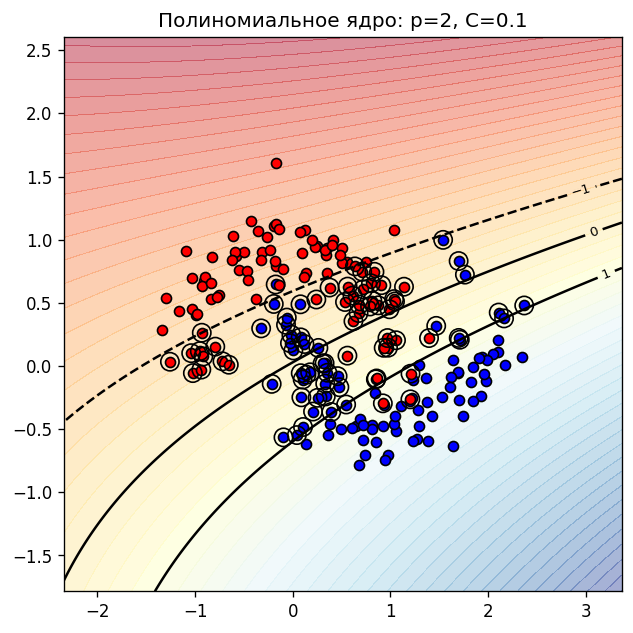

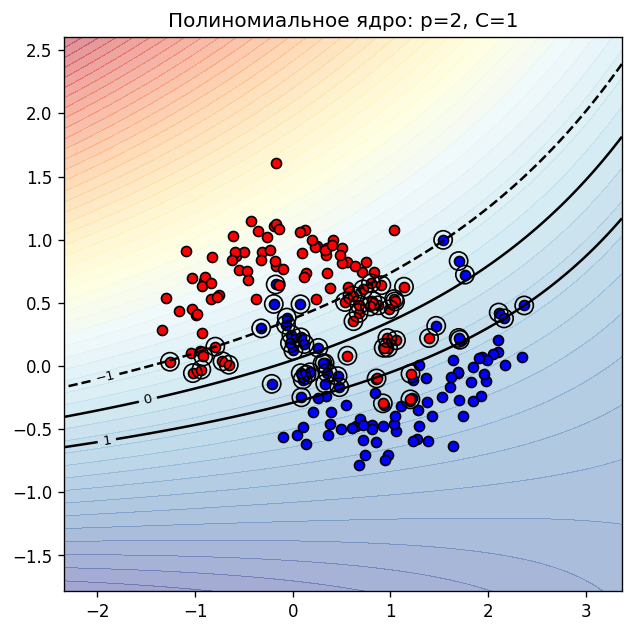

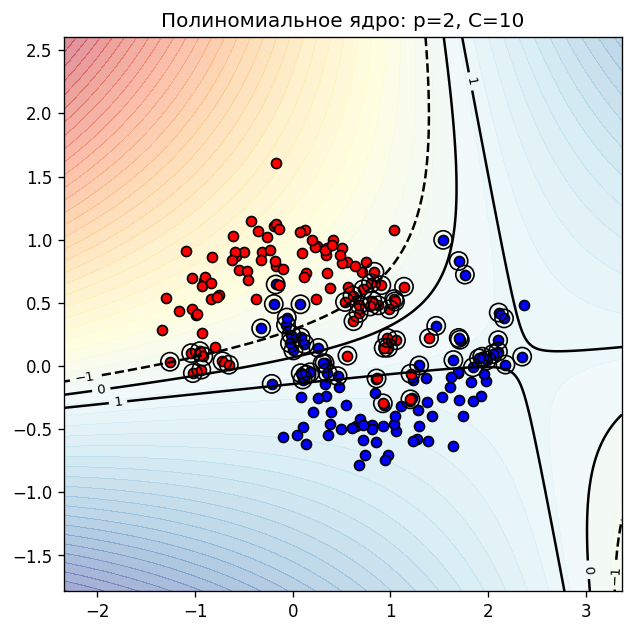

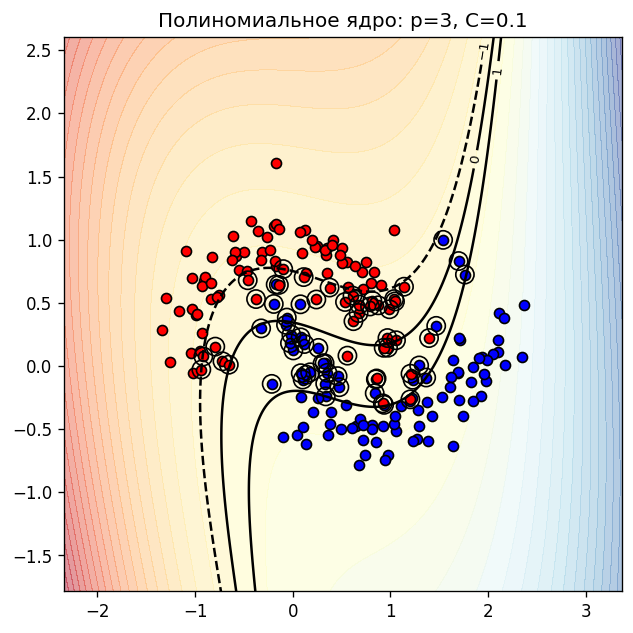

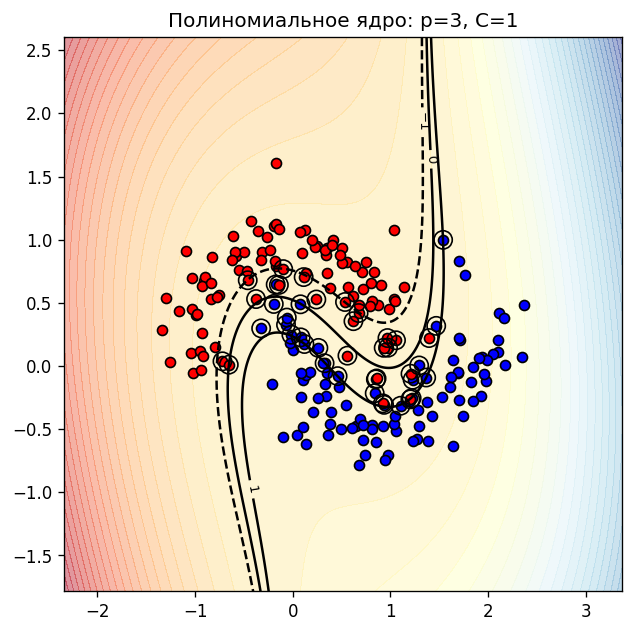

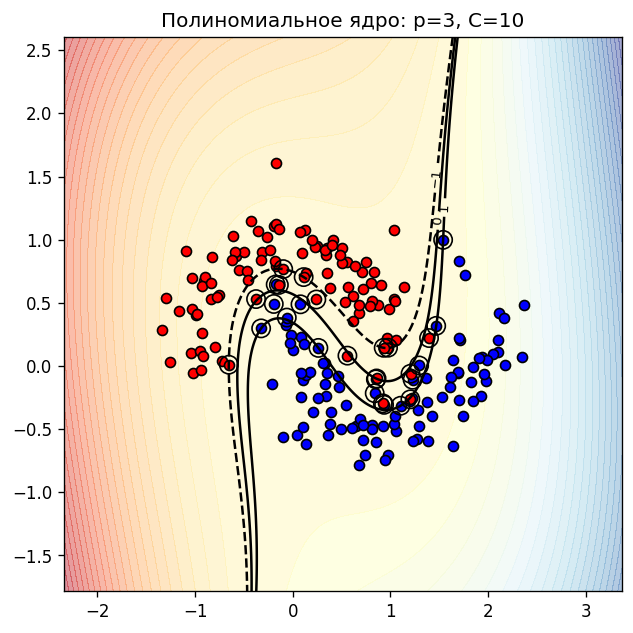

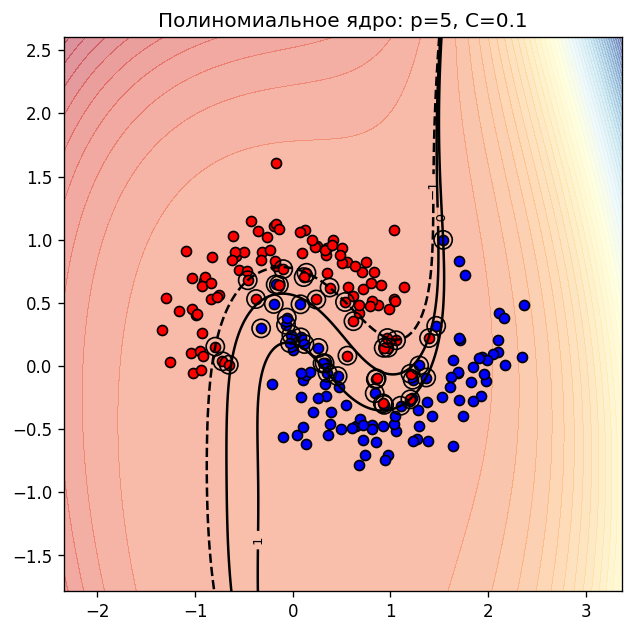

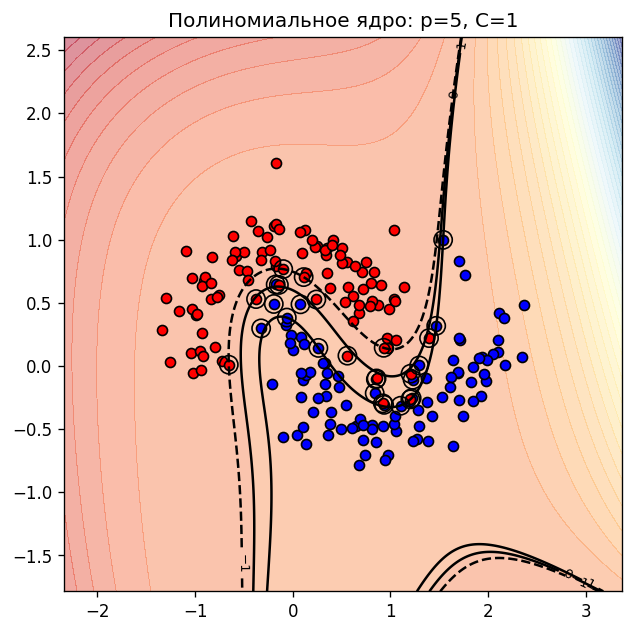

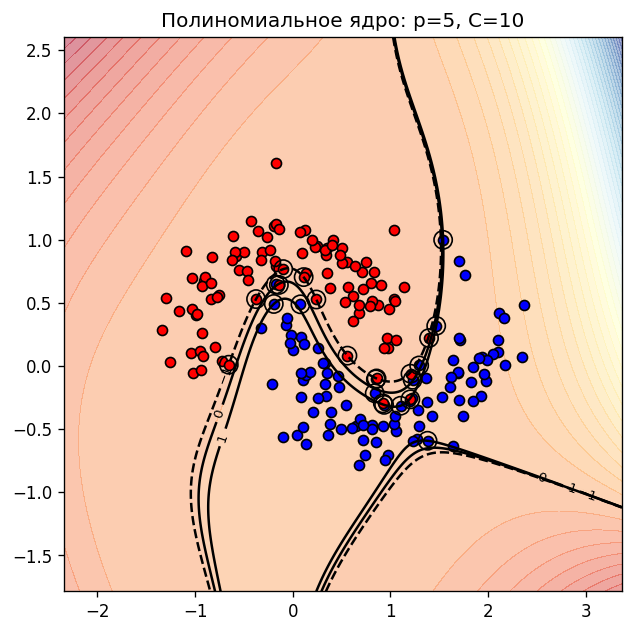

In [20]:
#3:Поведение SVM с полиномиальным ядром при разных C и p

ps = [2, 3, 5]
Cs = [0.1, 1, 10]

X, y = make_moons(n_samples=200, noise=0.2)
y = 2*y - 1

for p in ps:
    for C in Cs:
        model = train_dual_svm_qp(
            X, y, C=C,
            kernel_func=lambda a,b,pp=p: kernel_poly(a,b,p=pp)
        )
        title = f"Полиномиальное ядро: p={p}, C={C}"
        plot_svm_2d(model, X, y, title)

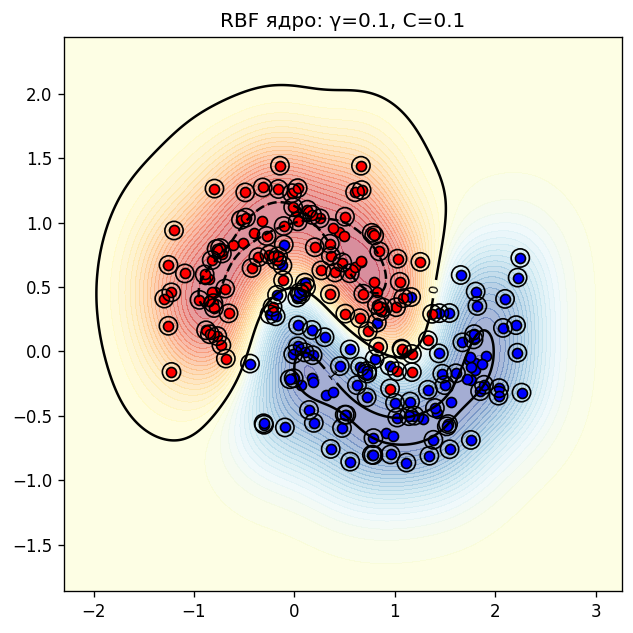

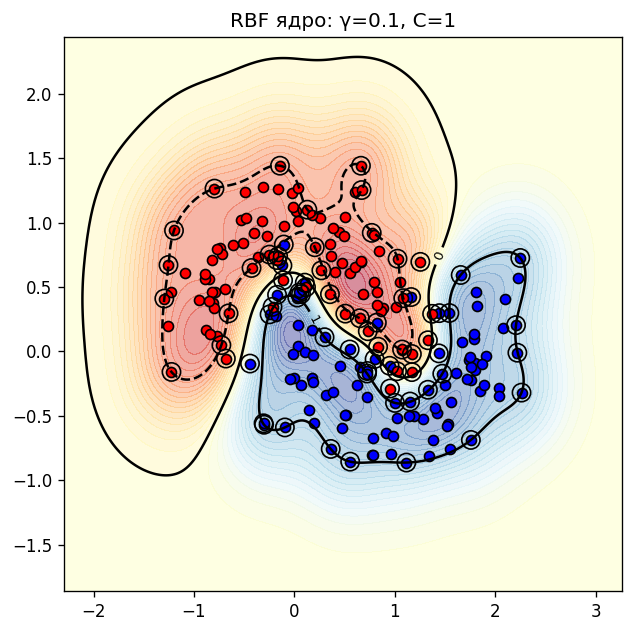

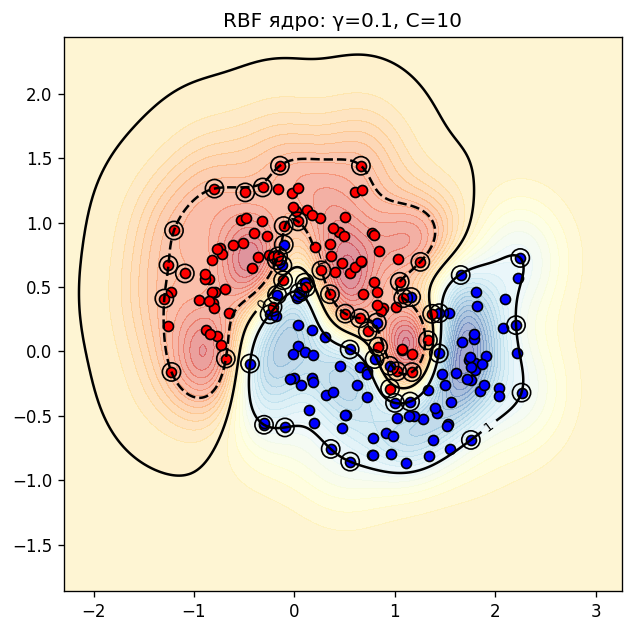

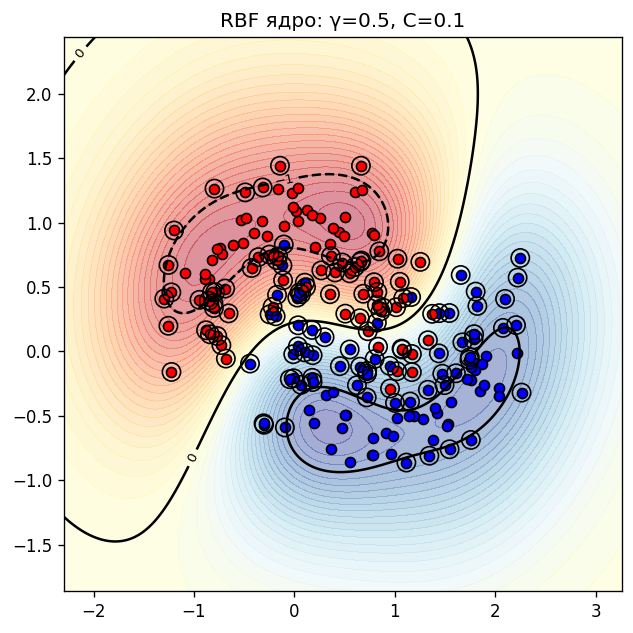

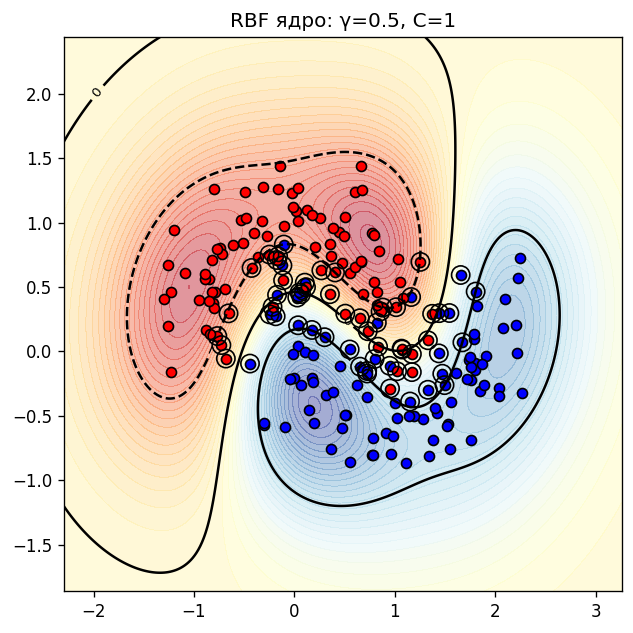

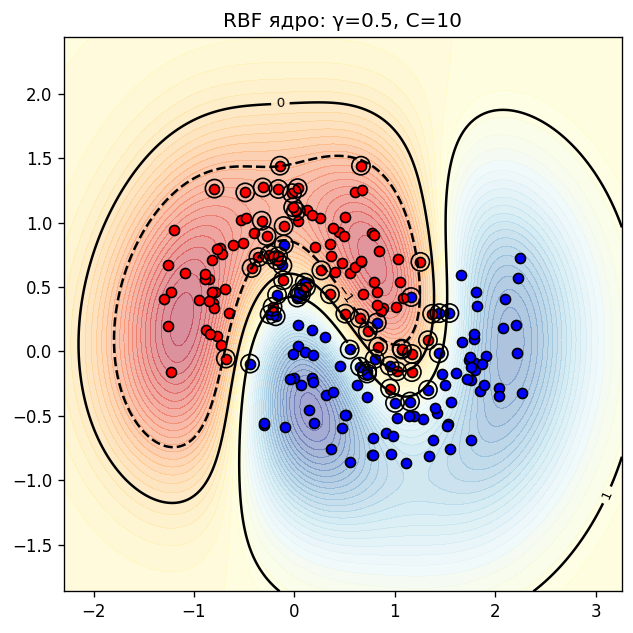

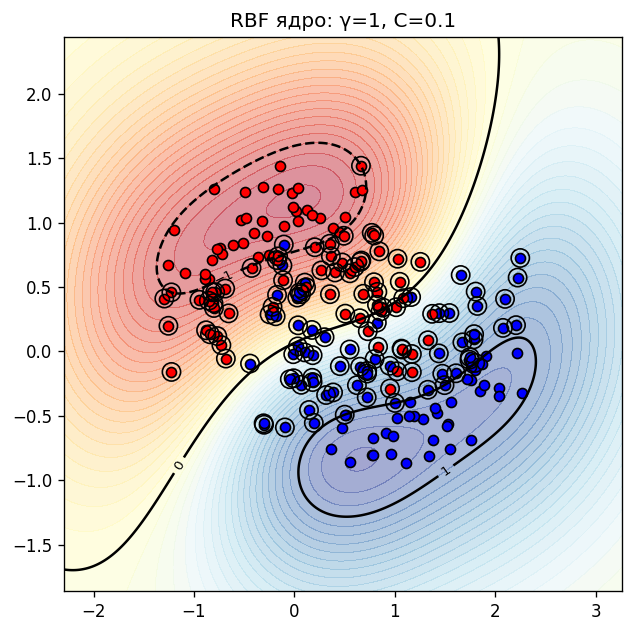

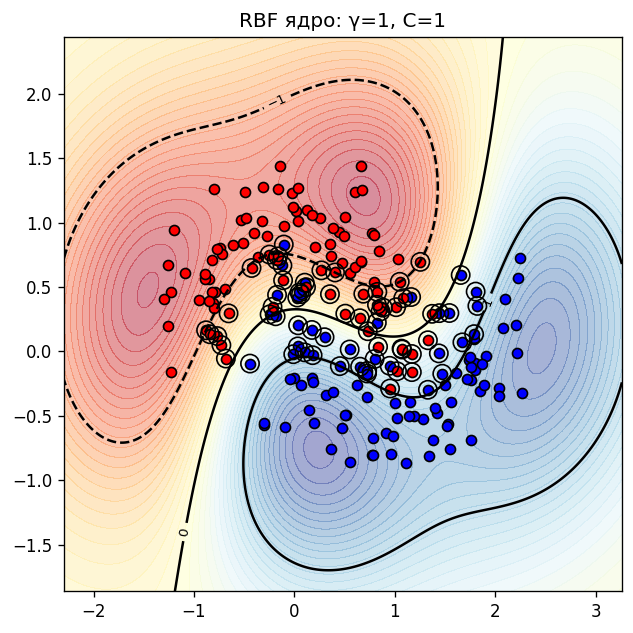

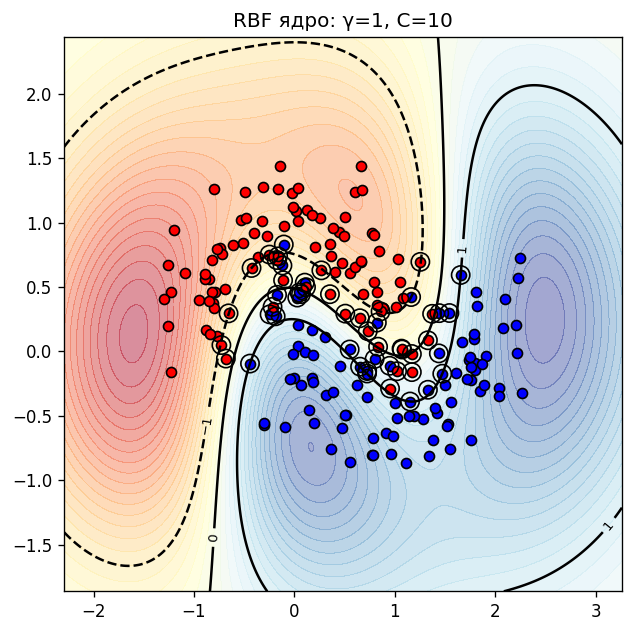

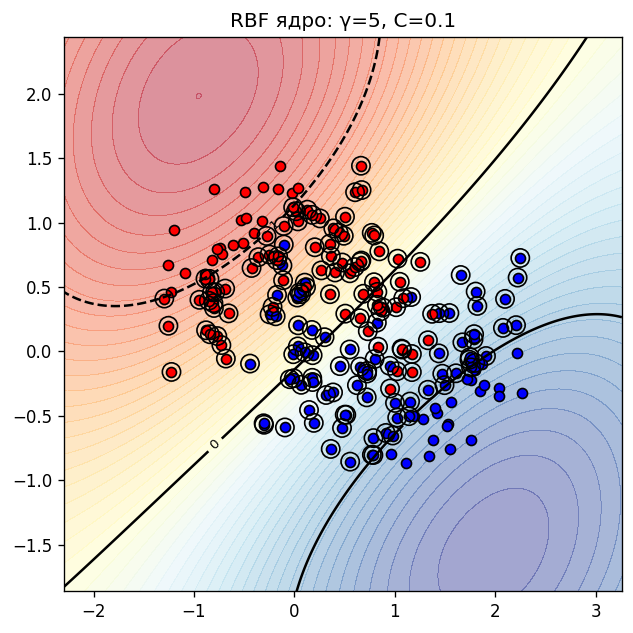

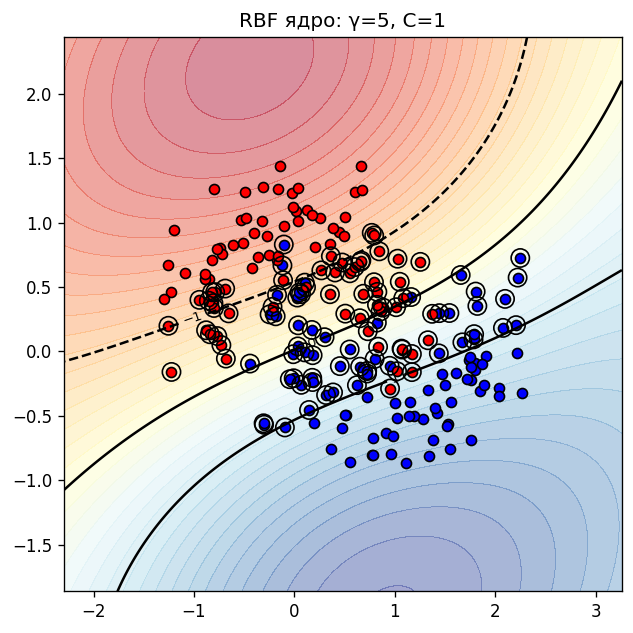

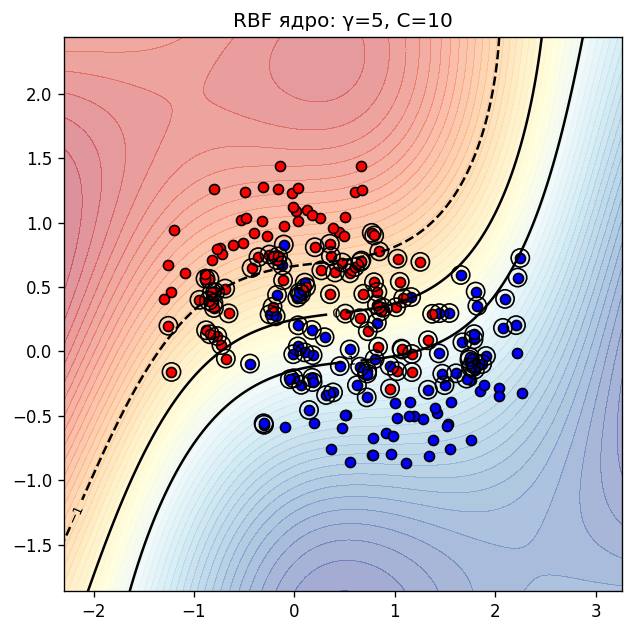

In [22]:
#4 Поведение SVM с RBF ядром при разных C и γ

gammas = [0.1, 0.5, 1, 5]
Cs = [0.1, 1, 10]

X, y = make_moons(n_samples=200, noise=0.25)
y = 2*y - 1

for gamma in gammas:
    for C in Cs:
        model = train_dual_svm_qp(
            X, y, C=C,
            kernel_func=lambda a,b,g=gamma: kernel_rbf(a,b,gamma=g)
        )
        title = f"RBF ядро: γ={gamma}, C={C}"
        plot_svm_2d(model, X, y, title)

# Примеры

Настройка вывода графиков [`Maplotlib`](http://matplotlib.org/) и импорт функций из модуля [`pylab`](http://wiki.scipy.org/PyLab).

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Визуальное решение задачи квадратичного программирования

На следующем рисунке наглядно показано решение задачи QP из задания 1. Оптимизируемая функция $f(\boldsymbol x)$ показана линиями уровня, область значений недопустимых ограничениями окрашена в серый цвет.

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


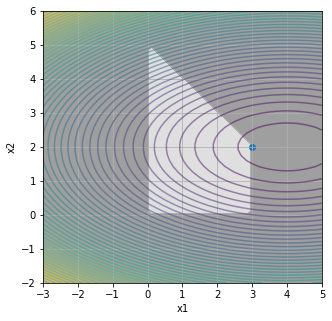

In [ ]:
x1 = linspace(-3, 5, 50)
x2 = linspace(-2, 6, 50)
xx1, xx2 = meshgrid(x1, x2)

f = -8*xx1 - 16*xx2 + xx1**2 + 4*xx2**2
constr1 = (xx1 + xx2 <= 5)
constr2 = (0 <= xx1) & (xx1 <= 3)
constr3 = (xx2 >= 0)

figure(figsize=(5, 5))
grid(True)
xlabel('x1')
ylabel('x2')

contour(x1, x2, f, 50, alpha=0.5)
contourf(x1, x2, constr1 & constr2 & constr3, 1, alpha=0.5, linewidths=4, cmap='gray')
_ = scatter([3], [2])

In [ ]:
np.array([True, False, False]) & np.array([True, False, True])

array([ True, False, False])

In [ ]:
np.logical_and(np.array([True, False, False]), np.array([True, False, True]))

array([ True, False, False])

## Установка и использование `CvxOpt`

Библиотека [`cvxopt`](http://cvxopt.org/) может быть установлена как обычный python-пакет:

In [ ]:
!pip install --upgrade --user cvxopt

  Using cached https://files.pythonhosted.org/packages/16/a0/0d090735e2639a74d6628831e02cc59284e3a3a4f5910f496fc6e435b645/cvxopt-1.2.5-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/56/39/537cb3e4e93f1ac5085dc3b3a43cfd99d0af9b29c44fcaa99490f526b611/mkl-2019.0-py2.py3-none-win_amd64.whl


Нас будет интересовать функция [`cvxopt.solvers.qp()`](http://cvxopt.org/examples/tutorial/qp.html):

In [ ]:
from cvxopt import solvers
?solvers.qp

## Пример работы с cvxopt

In [ ]:
from cvxopt import matrix

A = matrix([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], (2,3))
print(A)
print(A.size)

[ 1.00e+00  3.00e+00  5.00e+00]
[ 2.00e+00  4.00e+00  6.00e+00]

(2, 3)


In [ ]:
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],
            [0.0,-1.0,-3.0,5.0,4.0]])
print(G, G.size)

[-1.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00]
[-1.00e+00 -3.00e+00]
[ 2.00e+00  5.00e+00]
[ 3.00e+00  4.00e+00]
 (5, 2)


In [ ]:
from cvxopt import solvers

# Define QP parameters (directly)
P = matrix([[1.0,0.0],[0.0,0.0]])
q = matrix([3.0,4.0])
G = matrix([[-1.0,0.0,-1.0,2.0,3.0],[0.0,-1.0,-3.0,5.0,4.0]])
h = matrix([0.0,0.0,-15.0,100.0,80.0])
# Define QP parameters (with NumPy)
P = matrix(numpy.diag([1,0]), tc='d')
q = matrix(numpy.array([3,4]), tc='d')
G = matrix(numpy.array([[-1,0],[0,-1],[-1,-3],[2,5],[3,4]]), tc='d')
h = matrix(numpy.array([0,0,-15,100,80]), tc='d')
# Construct the QP, invoke solver
sol = solvers.qp(P,q,G,h)
# Extract optimal value and solution
print(sol['x']) # [7.13e-07, 5.00e+00]
print(sol['primal objective']) # 20.0000061731

     pcost       dcost       gap    pres   dres
 0:  1.0780e+02 -7.6366e+02  9e+02  4e-17  4e+01
 1:  9.3245e+01  9.7637e+00  8e+01  8e-17  3e+00
 2:  6.7311e+01  3.2553e+01  3e+01  8e-17  1e+00
 3:  2.6071e+01  1.5068e+01  1e+01  7e-17  7e-01
 4:  3.7092e+01  2.3152e+01  1e+01  1e-16  4e-01
 5:  2.5352e+01  1.8652e+01  7e+00  9e-17  4e-16
 6:  2.0062e+01  1.9974e+01  9e-02  7e-17  2e-16
 7:  2.0001e+01  2.0000e+01  9e-04  8e-17  2e-16
 8:  2.0000e+01  2.0000e+01  9e-06  1e-16  2e-16
Optimal solution found.
[ 7.13e-07]
[ 5.00e+00]

20.00000617311241


In [ ]:
sol

{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <5x1 matrix, tc='d'>,
 'z': <5x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 8.788553731701274e-06,
 'relative gap': 4.3942774404993765e-07,
 'primal objective': 20.00000617311241,
 'dual objective': 19.99999738455868,
 'primal infeasibility': 1.1710307819972547e-16,
 'dual infeasibility': 1.9860273225978186e-16,
 'primal slack': 7.131816408857108e-07,
 'dual slack': 1.50695110360481e-08,
 'iterations': 8}

In [ ]:
print(sol['x'])

[ 7.13e-07]
[ 5.00e+00]



Матрицы задач квадратичного программирования как правило разрежены, лучше использовать матричные операции над разреженными матрицами при реализации SVM.
[Разреженные и плотные матрицы](http://abel.ee.ucla.edu/cvxopt/userguide/matrices.html)

## Генерация случайной выборки для задачи классификации

В `SciKit-Learn` есть функция генерации случайных выборок для классификации [`sklearn.datasets.make_classification()`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Для того чтобы выборки не менялись при перезапуске ноутбука, используйте параметр `random_state`.

In [ ]:
from sklearn.datasets import make_classification

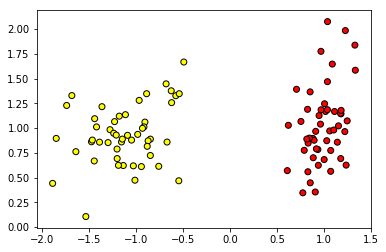

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='black')

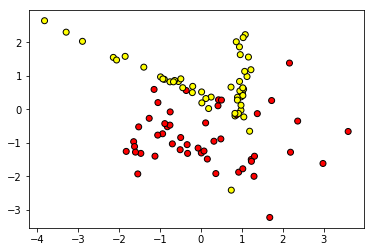

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=2)
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolor='black')

## Визуализация решающего правила

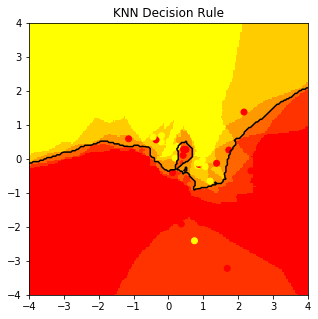

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

figure(figsize=(5, 5))
scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

xvals = linspace(-4, 4, 200)
yvals = linspace(-4, 4, 200)

xx, yy = np.meshgrid(xvals, yvals)
zz = np.reshape(model.predict_proba(c_[xx.ravel(), yy.ravel()])[:, 1], xx.shape)

# Цветной фон, соответствующий значению решающего правила
pcolormesh(xx, yy, zz, cmap='autumn', zorder=0)

# Линия уровня, соответствующая значению 0.5
contour(xx, yy, zz, levels=(0.5,), colors='k', linewidths=1.5, zorder=1)

xlim([-4, 4])
ylim([-4, 4])
_ = title('KNN Decision Rule')

## Реализация собственной модели для SciKit-Learn

В заданиях 2 и 3 требуется самостоятельно реализовать алгоритм обучения классификатора. Для того чтобы ваш алгоритм можно было использовать различными компонентами библиотеки SciKit-Learn (оценка качества, подбор параметров, композиции и т.д.) нужно всего лишь [реализовать интерфейс `BaseEstimator`](http://scikit-learn.org/stable/developers/#estimators).

In [23]:
from sklearn.base import BaseEstimator
import numpy as np

class LinearSVM(BaseEstimator):
    def __init__(self, C=1.0, transform=None):
        self.C = C
        self.transform = transform

    def fit(self, X, y):
        #Функция обучения модели.
        #вызываем train_primal_svm_qp и сохраняем найденные веса.

        if self.transform is not None:
            X_used = self.transform(X)
        else:
            X_used = X

        # Обучаем через функцию QP
        model = train_primal_svm_qp(X_used, y, C=self.C)

        # Сохраняем параметры
        self.weights_ = model['w']
        self.bias_ = model['b']
        self.xi_ = model['xi']
        self.sv_mask_ = model['sv_mask']
        self.margins_ = model['margins']
        self.success_ = model['success']

        return self

    def predict_proba(self, X):
        if self.transform is not None:
            X_used = self.transform(X)
        else:
            X_used = X

        return (X_used.dot(self.weights_) + self.bias_).flatten()

    def predict(self, X):
        return np.sign(self.predict_proba(X))

In [24]:
from sklearn.base import BaseEstimator
import numpy as np
import cvxopt as cvx

def linear_kernel(X, Z):
    return X @ Z.T

def poly_kernel(X, Z, degree=3):
    return (X @ Z.T + 1) ** degree

def rbf_kernel(X, Z, gamma=1.0):
    X2 = np.sum(X**2, axis=1)[:, None]
    Z2 = np.sum(Z**2, axis=1)[None, :]
    return np.exp(-(X2 + Z2 - 2 * X @ Z.T) / (2 * gamma))

class DualSVM(BaseEstimator):
    def __init__(self, C=1.0, kernel=None):

        self.C = C
        self.kernel = kernel if kernel is not None else linear_kernel

    def fit(self, X, y):
        X = np.asarray(X, float)
        y = np.asarray(y, float).reshape(-1)

        y[y == 0] = -1   # если были метки 0/1 ,делаем -1/+1
        self.X = X
        self.y = y
        N = len(y)


        # 1. Считаем матрицу ядра
        K = self.kernel(X, X)
        H = np.outer(y, y) * K


        # 2. Готовим параметры задачи QP:
        P = cvx.matrix(H)
        q = cvx.matrix(-np.ones(N))

        # Ограничения 0 ≤ a_i ≤ C
        G = cvx.matrix(np.vstack([
            -np.eye(N),
            np.eye(N)
        ]))
        h = cvx.matrix(np.hstack([
            np.zeros(N),
            np.ones(N) * self.C
        ]))

        # Условие Σ a_i y_i = 0
        A = cvx.matrix(y, (1, N), 'd')
        b = cvx.matrix(0.0)

        # 3. Решаем QP
        cvx.solvers.options['show_progress'] = False
        sol = cvx.solvers.qp(P, q, G, h, A, b)

        alpha = np.array(sol['x']).reshape(-1)
        self.alpha_ = alpha

        # 4. Находим опорные вектора
        sv_mask = (alpha > 1e-6)
        self.sv_mask = sv_mask
        self.sv_X = X[sv_mask]
        self.sv_y = y[sv_mask]
        self.sv_alpha = alpha[sv_mask]


        K_sv = self.kernel(self.sv_X, self.sv_X)
        self.bias_ = np.mean(
            self.sv_y - np.sum(self.sv_alpha * self.sv_y * K_sv, axis=1)
        )

        return self


    #предсказание (f(x))
    def predict_proba(self, X):

        X = np.asarray(X, float)
        K = self.kernel(self.sv_X, X)
        f = np.sum(self.sv_alpha[:, None] * self.sv_y[:, None] * K, axis=0)
        return f + self.bias_


    # Классификация (sign(f(x)))

    def predict(self, X):
        return np.sign(self.predict_proba(X))